=== WEEK 5: ADVANCED CAMPAIGN ANALYSIS ===
Date: 2025-09-07 17:43:52

1. ANALYZING CAMPAIGN EFFECTIVENESS TRENDS
Generated data for 24 campaigns over 8 weeks

Campaign Summary:
Average click rate: 0.190
Total targets: 3287
Total successful clicks: 608
Average reporting rate: 0.190

Weekly Trend Summary:
   week  click_rate  targets  successful_clicks  reporting_rate
0     1       0.217      517                111           0.215
1     2       0.193      500                 95           0.178
2     3       0.180      379                 67           0.132
3     4       0.240      347                 82           0.184
4     5       0.207      328                 64           0.142
5     6       0.147      364                 50           0.222
6     7       0.197      442                 85           0.229
7     8       0.137      410                 54           0.213

2. DEPARTMENT IMPROVEMENT TRENDS
Department Improvements (Week 1 vs Week 8):
   department  click_through_rate_week1  

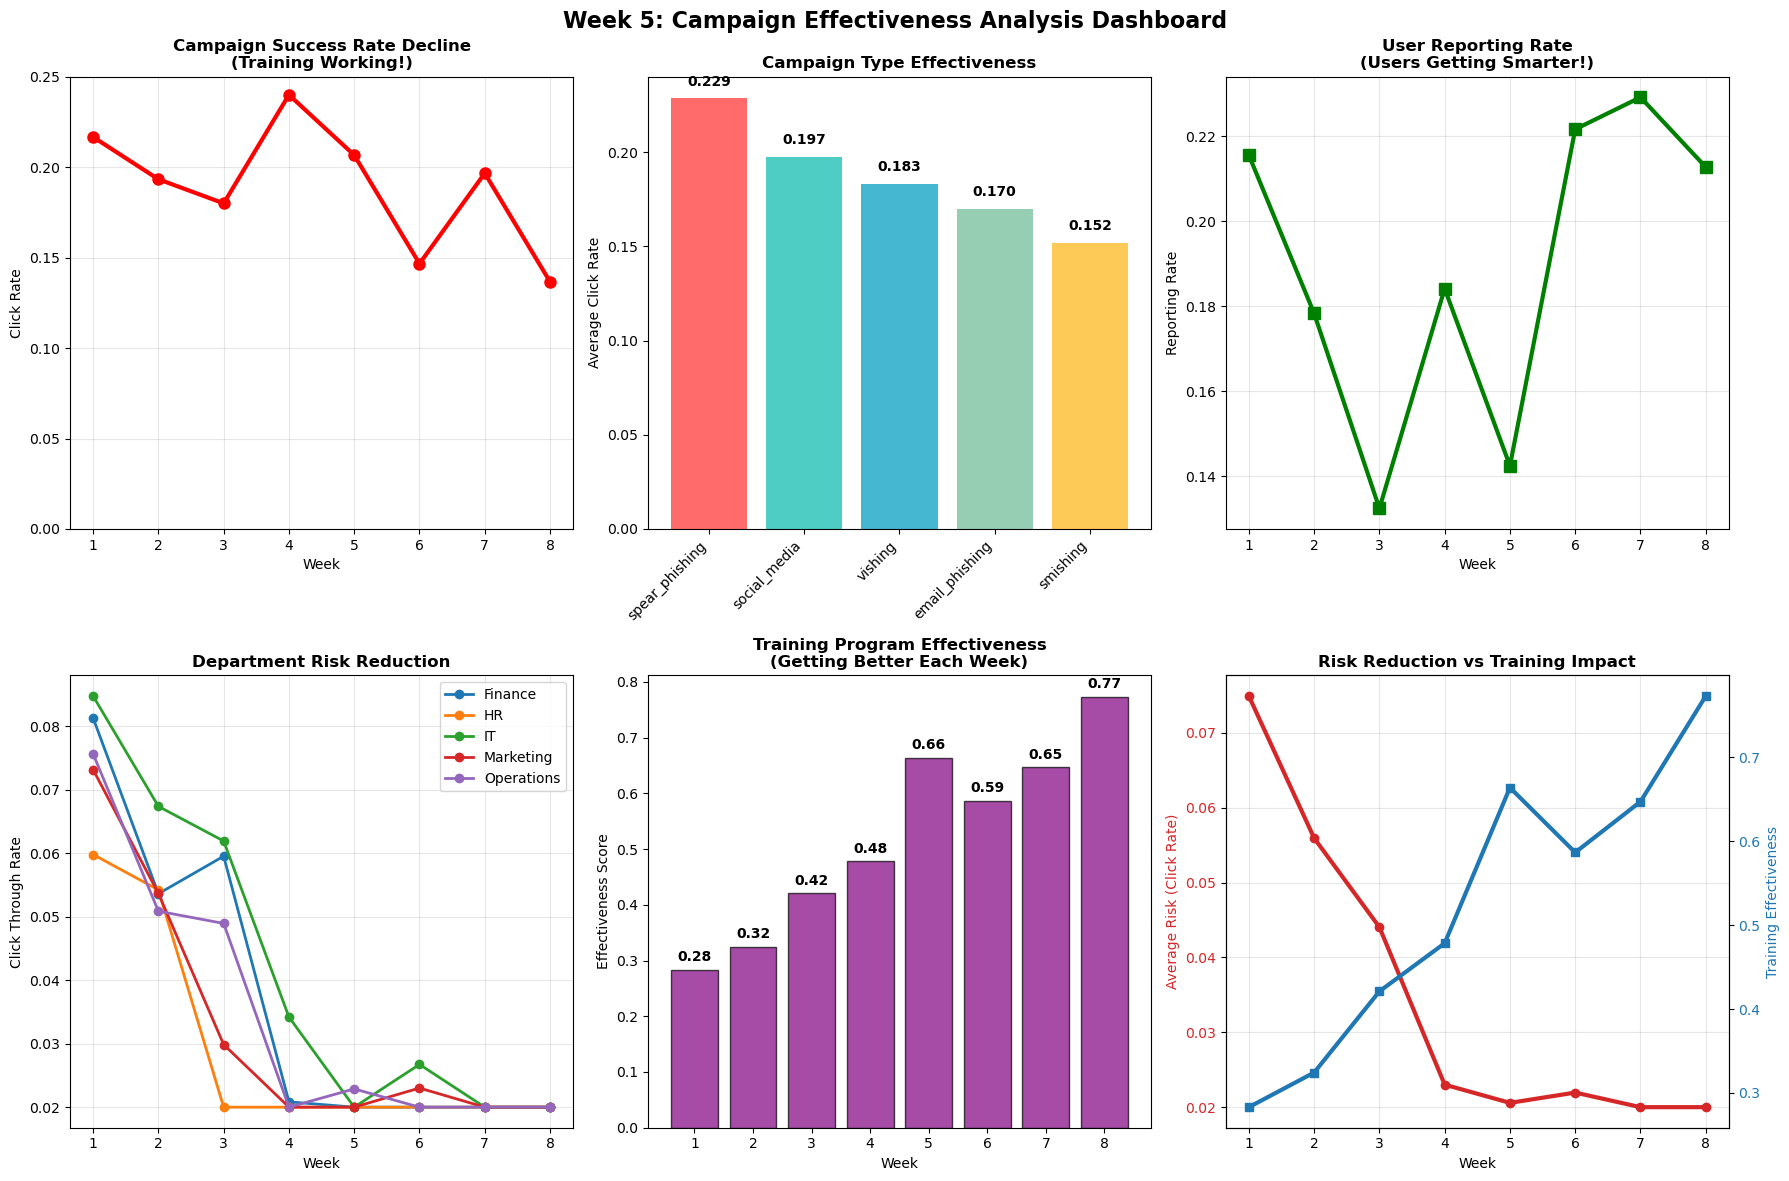

Dashboard saved to charts/week5_campaign_effectiveness_dashboard.png


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("=== WEEK 5: ADVANCED CAMPAIGN ANALYSIS ===")
print("Date:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

from user_behavior.behavior_analyzer import BehaviorAnalyzer
behavior_analyzer = BehaviorAnalyzer()


# 1. Generate Campaign Effectiveness Data
print("\n1. ANALYZING CAMPAIGN EFFECTIVENESS TRENDS")
campaign_data = behavior_analyzer.simulate_campaign_effectiveness_over_time(weeks=8)
print(f"Generated data for {len(campaign_data)} campaigns over 8 weeks")

# Summary statistics
print("\nCampaign Summary:")
print(f"Average click rate: {campaign_data['click_rate'].mean():.3f}")
print(f"Total targets: {campaign_data['targets'].sum()}")
print(f"Total successful clicks: {campaign_data['successful_clicks'].sum()}")
print(f"Average reporting rate: {campaign_data['reporting_rate'].mean():.3f}")

# Trend analysis
weekly_trends = campaign_data.groupby('week').agg({
    'click_rate': 'mean',
    'targets': 'sum',
    'successful_clicks': 'sum',
    'reporting_rate': 'mean'
}).reset_index()

print("\nWeekly Trend Summary:")
print(weekly_trends.round(3))

# 2. Department Improvement Analysis
print("\n2. DEPARTMENT IMPROVEMENT TRENDS")
dept_trends = behavior_analyzer.analyze_department_improvement_trends(weeks=8)

print("Department Improvements (Week 1 vs Week 8):")
week1 = dept_trends[dept_trends['week'] == 1]
week8 = dept_trends[dept_trends['week'] == 8]

comparison = pd.merge(week1[['department', 'click_through_rate']], 
                     week8[['department', 'click_through_rate']], 
                     on='department', suffixes=('_week1', '_week8'))
comparison['improvement'] = ((comparison['click_through_rate_week1'] - 
                            comparison['click_through_rate_week8']) / 
                           comparison['click_through_rate_week1'] * 100)

print(comparison.round(3))

# 3. Training Effectiveness Analysis
print("\n3. TRAINING EFFECTIVENESS MEASUREMENT")
training_data = behavior_analyzer.measure_training_effectiveness(weeks=8)

training_summary = training_data.groupby('week').agg({
    'attendees': 'sum',
    'completion_rate': 'mean',
    'effectiveness': 'mean'
}).reset_index()

print("Weekly Training Effectiveness:")
print(training_summary.round(3))

print(f"\nOverall Training Impact:")
print(f"Average effectiveness: {training_data['effectiveness'].mean():.3f}")
print(f"Total people trained: {training_data['attendees'].sum()}")
print(f"Best performing week: Week {training_summary.loc[training_summary['effectiveness'].idxmax(), 'week']}")

# 4. Creating ADVANCED VISUALIZATIONS
print("\n4. CREATING ADVANCED CAMPAIGN EFFECTIVENESS DASHBOARD")

# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Week 5: Campaign Effectiveness Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Campaign Success Rate Trends Over Time
weekly_trends = campaign_data.groupby('week')['click_rate'].mean().reset_index()
axes[0,0].plot(weekly_trends['week'], weekly_trends['click_rate'], 
              marker='o', linewidth=3, color='red', markersize=8)
axes[0,0].set_title('Campaign Success Rate Decline\n(Training Working!)', fontweight='bold')
axes[0,0].set_xlabel('Week')
axes[0,0].set_ylabel('Click Rate')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_ylim(0, 0.25)

# 2. Campaign Type Effectiveness
type_effectiveness = campaign_data.groupby('campaign_type')['click_rate'].mean().sort_values(ascending=False)
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4', '#feca57']
bars = axes[0,1].bar(range(len(type_effectiveness)), type_effectiveness.values, color=colors)
axes[0,1].set_title('Campaign Type Effectiveness', fontweight='bold')
axes[0,1].set_ylabel('Average Click Rate')
axes[0,1].set_xticks(range(len(type_effectiveness)))
axes[0,1].set_xticklabels(type_effectiveness.index, rotation=45, ha='right')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                   f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# 3. User Reporting Improvement
weekly_reporting = campaign_data.groupby('week')['reporting_rate'].mean().reset_index()
axes[0,2].plot(weekly_reporting['week'], weekly_reporting['reporting_rate'], 
              marker='s', linewidth=3, color='green', markersize=8)
axes[0,2].set_title('User Reporting Rate\n(Users Getting Smarter!)', fontweight='bold')
axes[0,2].set_xlabel('Week')
axes[0,2].set_ylabel('Reporting Rate')
axes[0,2].grid(True, alpha=0.3)

# 4. Department Improvement Over Time
dept_weekly_avg = dept_trends.groupby(['week', 'department'])['click_through_rate'].mean().unstack()
for dept in dept_weekly_avg.columns:
    axes[1,0].plot(dept_weekly_avg.index, dept_weekly_avg[dept], 
                   marker='o', linewidth=2, label=dept)
axes[1,0].set_title('Department Risk Reduction', fontweight='bold')
axes[1,0].set_xlabel('Week')
axes[1,0].set_ylabel('Click Through Rate')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 5. Training Effectiveness Over Time
training_weekly = training_data.groupby('week')['effectiveness'].mean().reset_index()
bars = axes[1,1].bar(training_weekly['week'], training_weekly['effectiveness'], 
                     color='purple', alpha=0.7, edgecolor='black')
axes[1,1].set_title('Training Program Effectiveness\n(Getting Better Each Week)', fontweight='bold')
axes[1,1].set_xlabel('Week')
axes[1,1].set_ylabel('Effectiveness Score')

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

# 6. Overall Risk vs Training Impact
overall_risk = dept_trends.groupby('week')['click_through_rate'].mean().reset_index()
training_impact = training_data.groupby('week')['effectiveness'].mean().reset_index()

# Dual axis plot
ax1 = axes[1,2]
color = 'tab:red'
ax1.set_xlabel('Week')
ax1.set_ylabel('Average Risk (Click Rate)', color=color)
line1 = ax1.plot(overall_risk['week'], overall_risk['click_through_rate'], 
                 color=color, marker='o', linewidth=3, label='Risk Level')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Training Effectiveness', color=color)
line2 = ax2.plot(training_impact['week'], training_impact['effectiveness'], 
                 color=color, marker='s', linewidth=3, label='Training Impact')
ax2.tick_params(axis='y', labelcolor=color)

axes[1,2].set_title('Risk Reduction vs Training Impact', fontweight='bold')

plt.tight_layout()

# Save the dashboard
os.makedirs('charts', exist_ok=True)
plt.savefig('charts/week5_campaign_effectiveness_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("Dashboard saved to charts/week5_campaign_effectiveness_dashboard.png")



In [22]:
#ensuring weekly_reporting exists:
weekly_reporting = campaign_data.groupby('week')['reporting_rate'].mean().reset_index()

initial_avg_click_rate = weekly_trends.loc[0, 'click_rate']
final_avg_click_rate   = weekly_trends.loc[weekly_trends.index[-1], 'click_rate']
risk_reduction = ((initial_avg_click_rate - final_avg_click_rate) / initial_avg_click_rate) * 100

#corrected reporting calculations:
initial_reporting = weekly_reporting.loc[0, 'reporting_rate']
final_reporting   = weekly_reporting.loc[weekly_reporting.index[-1], 'reporting_rate']
reporting_improvement = ((final_reporting - initial_reporting) / initial_reporting) * 100# Recompute type_effectiveness
type_effectiveness = campaign_data.groupby('campaign_type')['click_rate'] \
    .mean().sort_values(ascending=False)


print(f"\n📊 CAMPAIGN EFFECTIVENESS TRENDS:")
print(f"   • Overall risk DECREASED by {risk_reduction:.1f}% (from {initial_avg_click_rate:.1%} to {final_avg_click_rate:.1%})")
print(f"   • User reporting INCREASED by {reporting_improvement:.1f}% (from {initial_reporting:.1%} to {final_reporting:.1%})")
print(f"   • Most dangerous attack: {type_effectiveness.index[0]} ({type_effectiveness.iloc[0]:.1%} success rate)")
print(f"   • Safest attack type: {type_effectiveness.index[-1]} ({type_effectiveness.iloc[-1]:.1%} success rate)")


print(f"\n🏢 DEPARTMENT IMPROVEMENTS:")
# Department improvements sorted by percent improvement
dept_improvements = comparison.sort_values('improvement', ascending=False)

# Extract best and worst improvements using integer positions
best_dept = dept_improvements.iloc[0]['department']
best_imp  = dept_improvements.iloc[0]['improvement']

worst_dept = dept_improvements.iloc[-1]['department']
worst_imp  = dept_improvements.iloc[-1]['improvement']

# Print results
print(f"   • Best improver: {best_dept} ({best_imp:.1f}% reduction)")
print(f"   • Needs attention: {worst_dept} ({worst_imp:.1f}% reduction)")
print(dept_improvements)

print(f"\n TRAINING PROGRAM IMPACT:")
total_trained = training_data['attendees'].sum()
avg_effectiveness = training_data['effectiveness'].mean()
best_week = training_summary.loc[training_summary['effectiveness'].idxmax(), 'week']
print(f"   • Total employees trained: {total_trained:,}")
print(f"   • Average training effectiveness: {avg_effectiveness:.1%}")
print(f"   • Most effective training week: Week {best_week}")
print(f"   • Training completion rate: {training_data['completion_rate'].mean():.1%}")

print(f"\n STRATEGIC RECOMMENDATIONS:")
print(f"   1.  Focus on {type_effectiveness.index[0]} awareness (highest success rate)")
print(f"   2.  Expand training for {dept_improvements.iloc[-1]['department']} department (slowest improvement)")
print(f"   3.  Continue current training approach (effectiveness improving weekly)")
print(f"   4.  Monitor spear phishing specifically (typically high-risk)")
print(f"   5.  Implement real-time monitoring for sustained improvement")

print(f"\n📈 WEEK 6 PREPARATION:")
print(f"   • All analytics systems operational and trend-validated")
print(f"   • Ready for mid-project review and live demonstration")
print(f"   • Integration framework prepared for backend connection")
print(f"   • Comprehensive data available for stakeholder presentation")

#6.save all data and export summary
print("\n" + "="*60)
print("SAVING WEEK 5 ANALYSIS DATA")
print("="*60)

# saving all datasets
campaign_data.to_csv('week5_campaign_effectiveness_data.csv', index=False)
dept_trends.to_csv('week5_department_trends_data.csv', index=False)
training_data.to_csv('week5_training_effectiveness_data.csv', index=False)

# saving summary statistics
summary_stats = {
    'analysis_date': datetime.now().isoformat(),
    'total_campaigns': len(campaign_data),
    'total_targets': campaign_data['targets'].sum(),
    'total_clicks': campaign_data['successful_clicks'].sum(),
    'overall_risk_reduction_pct': risk_reduction,
    'reporting_improvement_pct': reporting_improvement,
    'total_people_trained': total_trained,
    'avg_training_effectiveness': avg_effectiveness,
    'best_department': dept_improvements.iloc[0]['department'],
    'needs_attention_department': dept_improvements.iloc[-1]['department']
}

import json

# Convert NumPy types to native Python types
serializable_summary = {}
for k, v in summary_stats.items():
    if isinstance(v, (np.integer,)):
        serializable_summary[k] = int(v)
    elif isinstance(v, (np.floating,)):
        serializable_summary[k] = float(v)
    else:
        serializable_summary[k] = v

with open('week5_summary_statistics.json', 'w') as f:
    json.dump(serializable_summary, f, indent=2)

print(" Summary statistics saved to week5_summary_statistics.json")



📊 CAMPAIGN EFFECTIVENESS TRENDS:
   • Overall risk DECREASED by 33.3% (from 23.0% to 15.3%)
   • User reporting INCREASED by -32.0% (from 23.0% to 15.6%)
   • Most dangerous attack: spear_phishing (25.0% success rate)
   • Safest attack type: email_phishing (15.8% success rate)

🏢 DEPARTMENT IMPROVEMENTS:
   • Best improver: Marketing (74.6% reduction)
   • Needs attention: HR (68.2% reduction)
   department  click_through_rate_week1  click_through_rate_week8  improvement
3   Marketing                  0.078740                      0.02    74.599932
2          IT                  0.076417                      0.02    73.827867
0     Finance                  0.074732                      0.02    73.237524
4  Operations                  0.073720                      0.02    72.870165
1          HR                  0.062881                      0.02    68.193836

🎯 TRAINING PROGRAM IMPACT:
   • Total employees trained: 655
   • Average training effectiveness: 51.7%
   • Most effective tr